In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def ColeColePelton(f, sigmaInf, eta, tau, c, option):
    """
    
        .. math::
            \sigma(\omega) = \sigma_{\infty}\Big(1-\frac{\eta}{1+(1-\eta)(\imath\omega\tau)^c} \Big)
            
    """
    w = 2*np.pi*f
    sigma = sigmaInf*(1 - eta/(1 + (1-eta)*(1j*w*tau)**c))
    if option=="sigma":
        return sigma
    elif option=="resis":
        return 1./(sigma)
    else:
        raise Exception("Put only sigma or resis")

In [3]:
from scipy.interpolate import interp1d
def transFilt(datFcn, t, tol=1e-12):
	"""

		Add explanation about Digital filtering

	"""
	# Make it work for a single time
	if np.size(t) == 1:
	    singleTime = True
	    t = np.r_[t/10., t, 10.*t]
	else:
	    singleTime = False

	# Define the filter coeffs
	wt = np.array([7.214369775966785e-20, 5.997984537445829e-20, 1.383536819510307e-20, 6.127201193993877e-20, 2.735622069700930e-20, 6.567948836420383e-20, 4.144963335850363e-20, 7.316414067200350e-20, 5.682375914662966e-20, 8.391977074915078e-20, 7.418756524583309e-20, 9.829637687190485e-20, 9.430643800653847e-20, 1.168146262188112e-19, 1.180370735968097e-19, 1.401723019040171e-19, 1.463726071463266e-19, 1.692722072070252e-19, 1.804796158499069e-19, 2.052560499147526e-19, 2.217507732438609e-19, 2.495469564846162e-19, 2.718603842873614e-19, 3.039069705922034e-19, 3.328334008394297e-19, 3.705052796297763e-19, 4.071277819975917e-19, 4.520053409594589e-19, 4.977334107366132e-19, 5.516707191291291e-19, 6.082931168675559e-19, 6.734956703766505e-19, 7.432489554623685e-19, 8.223651399147256e-19, 9.080210233648037e-19, 1.004250388267800e-18, 1.109225156214032e-18, 1.226448534750949e-18, 1.354938655056596e-18, 1.497875155579711e-18, 1.655024636692164e-18, 1.829422009902478e-18, 2.021527957180686e-18, 2.234394042862191e-18, 2.469158736824458e-18, 2.729043278909879e-18, 3.015882778812807e-18, 3.333221019045560e-18, 3.683642665131121e-18, 4.071174485366807e-18, 4.499238428427072e-18, 4.972519918024098e-18, 5.495403162992602e-18, 6.073431145514256e-18, 6.712116746365455e-18, 7.418091347704607e-18, 8.198210388921290e-18, 9.060466264497684e-18, 1.001332641867938e-17, 1.106647001686341e-17, 1.223031194783507e-17, 1.351661046246575e-17, 1.493814249254853e-17, 1.650922025025269e-17, 1.824549287949245e-17, 2.016440324953847e-17, 2.228509875325462e-17, 2.462885473506622e-17, 2.721908372832262e-17, 3.008174877960754e-17, 3.324546598231868e-17, 3.674192913569353e-17, 4.060610542324258e-17, 4.487669220181069e-17, 4.959641037849226e-17, 5.481251456381401e-17, 6.057719336989671e-17, 6.694815564512041e-17, 7.398915178848498e-17, 8.177066132132114e-17, 9.037055462918574e-17, 9.987491078055815e-17, 1.103788451159722e-16, 1.219874911140742e-16, 1.348170262066998e-16, 1.489958578076007e-16, 1.646658879212839e-16, 1.819839514458913e-16, 2.011233698894207e-16, 2.222757000537238e-16, 2.456526388749016e-16, 2.714881529754608e-16, 3.000408107960083e-16, 3.315963787425073e-16, 3.664706739627943e-16, 4.050127315080793e-16, 4.476082920363670e-16, 4.946836672898304e-16, 5.467100025245505e-16, 6.042079955957903e-16, 6.677531050397348e-16, 7.379813122861424e-16, 8.155954842977402e-16, 9.013724102689123e-16, 9.961705740887021e-16, 1.100938748010566e-15, 1.216725486808607e-15, 1.344689623369201e-15, 1.486111865526057e-15, 1.642407614840039e-15, 1.815141131499014e-15, 2.006041190779248e-15, 2.217018384471440e-15, 2.450184243392977e-15, 2.707872369692257e-15, 2.992661792874233e-15, 3.307402781094011e-15, 3.655245368051253e-15, 4.039670879180488e-15, 4.464526774284602e-15, 4.934065153895433e-15, 5.452985315986473e-15, 6.026480787914038e-15, 6.660291305149181e-15, 7.360760256360466e-15, 8.134898170257041e-15, 8.990452879276204e-15, 9.935987062502841e-15, 1.098096394385775e-14, 1.213584200318437e-14, 1.341217964828528e-14, 1.482275089528562e-14, 1.638167321535499e-14, 1.810454882702344e-14, 2.000862084851265e-14, 2.211294587257239e-14, 2.443858469135401e-14, 2.700881307980678e-14, 2.984935474755050e-14, 3.298863879030854e-14, 3.645808421795958e-14, 4.029241440643229e-14, 4.453000462105175e-14, 4.921326608894885e-14, 5.438907046503769e-14, 6.010921893911273e-14, 6.643096067976429e-14, 7.341756580308676e-14, 8.113895860149252e-14, 8.967241736929777e-14, 9.910334783010448e-14, 1.095261379057530e-13, 1.210451023825933e-13, 1.337755269287210e-13, 1.478448219118764e-13, 1.633937975650728e-13, 1.805780732628623e-13, 1.995696350122467e-13, 2.205585567465074e-13, 2.437549026489779e-13, 2.693908295460095e-13, 2.977229104105259e-13, 3.290347022305518e-13, 3.636395839428896e-13, 4.018838928348062e-13, 4.441503908040617e-13, 4.908620951685787e-13, 5.424865123659980e-13, 5.995403169151822e-13, 6.625945224685207e-13, 7.322801967084261e-13, 8.092947772848716e-13, 8.944090520057436e-13, 9.884748731403624e-13, 1.092433683043238e-12, 1.207325936425662e-12, 1.334301513576084e-12, 1.474631228748613e-12, 1.629719548899119e-12, 1.801118650062676e-12, 1.990543952052933e-12, 2.199891286960273e-12, 2.431255873276498e-12, 2.686953285545802e-12, 2.969542629413028e-12, 3.281852154013172e-12, 3.627007558039277e-12, 4.008463272785582e-12, 4.430037035256956e-12, 4.895948097364050e-12, 5.410859453614547e-12, 5.979924509929487e-12, 6.608838660661838e-12, 7.303896290017477e-12, 8.072053768367932e-12, 8.920999073943177e-12, 9.859228736701785e-12, 1.089613287445852e-11, 1.204208917233957e-11, 1.330856674614333e-11, 1.470824092910627e-11, 1.625512013089818e-11, 1.796468603849469e-11, 1.985404856210394e-11, 2.194211707689892e-11, 2.424978967439970e-11, 2.680016231759770e-11, 2.961875999311579e-11, 3.273379217385409e-11, 3.617643514887572e-11, 3.998114404618718e-11, 4.418599767123930e-11, 4.883307961241208e-11, 5.396889942771051e-11, 5.964485812805529e-11, 6.591776261587440e-11, 7.285039422767879e-11, 8.051213707077629e-11, 8.897967244274265e-11, 9.833774628361575e-11, 1.086800173417544e-10, 1.201099945420632e-10, 1.327420729381141e-10, 1.467026786162787e-10, 1.621315340105112e-10, 1.791830562914075e-10, 1.980279028251780e-10, 2.188546791698937e-10, 2.418718267033471e-10, 2.673097087743666e-10, 2.954229162567076e-10, 3.264928155800021e-10, 3.608303647396648e-10, 3.987792254688925e-10, 4.407192027209688e-10, 4.870700458846789e-10, 5.382956497775456e-10, 5.949086974607432e-10, 6.574757913439202e-10, 7.266231239320192e-10, 8.030427449710128e-10, 8.874994877135167e-10, 9.808386236281220e-10, 1.083994322159010e-09, 1.197999000209434e-09, 1.323993654914953e-09, 1.463239283128961e-09, 1.617129501899646e-09, 1.787204496262075e-09, 1.975166433922344e-09, 2.182896501130837e-09, 2.412473730218034e-09, 2.666195807259519e-09, 2.946602068077095e-09, 3.256498912782063e-09, 3.598987893149563e-09, 3.977496754017933e-09, 4.395813739277522e-09, 4.858125505931142e-09, 5.369059025511281e-09, 5.933727892433384e-09, 6.557783502483194e-09, 7.247471613991360e-09, 8.009694857348590e-09, 8.852081819018630e-09, 9.783063390784292e-09, 1.081195714921208e-08, 1.194906060875559e-08, 1.320575428316232e-08, 1.459461558495058e-08, 1.612954470504804e-08, 1.782590372973567e-08, 1.970067039062624e-08, 2.177260798218037e-08, 2.406245315273551e-08, 2.659312344174916e-08, 2.938994664888302e-08, 3.248091431980495e-08, 3.589696189917651e-08, 3.967227833770833e-08, 4.384464827330457e-08, 4.845583018407081e-08, 5.355197433170284e-08, 5.918408463559961e-08, 6.540852915386353e-08, 7.228760421284378e-08, 7.989015791604288e-08, 8.829227916594097e-08, 9.757805922900159e-08, 1.078404332968648e-07, 1.191821106789995e-07, 1.317166026689236e-07, 1.455693587079098e-07, 1.608790217936311e-07, 1.777988162313823e-07, 1.964980809461758e-07, 2.171639645456637e-07, 2.400032980365736e-07, 2.652446652738443e-07, 2.931406901825997e-07, 3.239705657602287e-07, 3.580428475071237e-07, 3.956985425939703e-07, 4.373145214673157e-07, 4.833072913425415e-07, 5.341371626757850e-07, 5.903128587132423e-07, 6.523966036832935e-07, 7.210097538541495e-07, 7.968390110811429e-07, 8.806433020866372e-07, 9.732613658282036e-07, 1.075620158230134e-06, 1.188744116446123e-06, 1.313765428158270e-06, 1.451935342270991e-06, 1.604636717777632e-06, 1.773397831228256e-06, 1.959907713317686e-06, 2.166033001576880e-06, 2.393836687356070e-06, 2.645598681084377e-06, 2.923838733370935e-06, 3.231341523918154e-06, 3.571184694601016e-06, 3.946769446344899e-06, 4.361854837678969e-06, 4.820595081762782e-06, 5.327581531949061e-06, 5.887888119174313e-06, 6.507122780830562e-06, 7.191482772393097e-06, 7.947817716468041e-06, 8.783696866498923e-06, 9.707486485040472e-06, 1.072843153422521e-05, 1.185675077161778e-05, 1.310373578995573e-05, 1.448186809502301e-05, 1.600493890578862e-05, 1.768819362222417e-05, 1.954847630132444e-05, 2.160440843572022e-05, 2.387656249074371e-05, 2.638768394666778e-05, 2.916289862392297e-05, 3.222998971512441e-05, 3.561964367629314e-05, 3.936579782365431e-05, 4.350592904974602e-05, 4.808149299156779e-05, 5.313825827671661e-05, 5.872686606041739e-05, 6.490320915255368e-05, 7.172915206849267e-05, 7.927294798468421e-05, 8.761017620761336e-05, 9.682417843295337e-05, 1.070072955978771e-04, 1.182612851235724e-04, 1.306989769939818e-04, 1.444446003274482e-04, 1.596360362963627e-04, 1.764249271609239e-04, 1.949797924244976e-04, 2.154857030671910e-04, 2.381486646105023e-04, 2.631944925246626e-04, 2.908750792099106e-04, 3.214658697246949e-04, 3.552749625435381e-04, 3.926382043270680e-04, 4.339325952975191e-04, 4.795674127479124e-04, 5.300042093562213e-04, 5.857414026355948e-04, 6.473444397414629e-04, 7.154197401707392e-04, 7.906606243262904e-04, 8.738040302727717e-04, 9.657009935888906e-04, 1.067245638145834e-03, 1.179484028621435e-03, 1.303498707764836e-03, 1.440577691237741e-03, 1.592027938865682e-03, 1.759438818176274e-03, 1.944382214020240e-03, 2.148824632015574e-03, 2.374646777242952e-03, 2.624289840901410e-03, 2.899987938462482e-03, 3.204783728012370e-03, 3.541304571287609e-03, 3.913361077715114e-03, 4.323998734848948e-03, 4.778017035442578e-03, 5.278871213895021e-03, 5.832645828904957e-03, 6.443132211847618e-03, 7.118100704687155e-03, 7.861484687059508e-03, 8.683286454219962e-03, 9.587172959576953e-03, 1.058612645311708e-02, 1.168276512339872e-02, 1.289407692301174e-02, 1.422020567085629e-02, 1.568354709989395e-02, 1.727924763496293e-02, 1.903701004445868e-02, 2.094259894090355e-02, 2.303555498203885e-02, 2.528473397535577e-02, 2.774280095909549e-02, 3.034889679856765e-02, 3.317292189089636e-02, 3.610269051747732e-02, 3.923023471609136e-02, 4.235591398256915e-02, 4.559945470018810e-02, 4.861418172220856e-02, 5.155399423688033e-02, 5.382905665985834e-02, 5.563737547309198e-02, 5.599656739496778e-02, 5.517328802198061e-02, 5.157565446188783e-02, 4.561585237274122e-02, 3.481744626013846e-02, 1.997678484763328e-02, -2.511444299727086e-03, -3.078890380569448e-02, -6.952663437748715e-02, -1.140926319655417e-01, -1.692861783153246e-01, -2.240265004914591e-01, -2.809223452446239e-01, -3.165386782849084e-01, -3.295050746499982e-01, -2.805919713655642e-01, -1.744060875765448e-01, 2.722628846693606e-02, 2.668949880744598e-01, 5.262102231394616e-01, 6.256684356927903e-01, 4.995016301447683e-01, -1.002368152582941e-02, -6.114010724740713e-01, -9.727382503860407e-01, -3.838420705230950e-01, 7.198704705669955e-01, 1.262041888009595e+00, -2.998397076312483e-01, -1.479978761932394e+00, 1.886890549669046e-01, 1.961538671802124e+00, -2.104506074490929e+00, 7.701373097387101e-01, 4.062497351127477e-01, -8.229740504000808e-01, 7.307456920106093e-01, -4.903037312539515e-01, 2.839808721720737e-01, -1.517915989046718e-01, 7.860615976683388e-02, -4.139435902417716e-02, 2.340179865400356e-02, -1.488928090494461e-02, 1.080204283974104e-02, -8.695630540330540e-03, 7.448774255862835e-03, -6.571253694245813e-03, 5.859704720178251e-03, -5.235154219023063e-03, 4.669537109654244e-03, -4.153880559277143e-03, 3.685278478886407e-03, -3.262012231674279e-03, 2.882025619739767e-03, -2.542670610556139e-03, 2.240859550470028e-03, -1.973292341858488e-03, 1.736649256291777e-03, -1.527725614465373e-03, 1.343513590939351e-03, -1.181244115916277e-03, 1.038401885876272e-03, -9.127236961818876e-04, 8.021869803583510e-04, -7.049929363136232e-04, 6.195471678105551e-04, -5.444398377266471e-04, 4.784265058211163e-04, -4.204101656165671e-04, 3.694246665626042e-04, -3.246196272200836e-04, 2.852468930079681e-04, -2.506484828993674e-04, 2.202458813636377e-04, -1.935305291014704e-04, 1.700554065180346e-04, -1.494276181460851e-04, 1.313018693894386e-04, -1.153747197310416e-04, 1.013795159657149e-04, -8.908193308740761e-05, 7.827605834070905e-05, -6.878095175364698e-05, 6.043762035968366e-05, -5.310635544925448e-05, 4.666439257514449e-05, -4.100385733848758e-05, 3.602996086454923e-05, -3.165941281357187e-05, 2.781902585783293e-05, -2.444448983707277e-05, 2.147929539928508e-05, -1.887378820764930e-05, 1.658433732127529e-05, -1.457260421932255e-05, 1.280490076321861e-05, -1.125162529600942e-05, 9.886767060922143e-06, -8.687470528401389e-06, 7.633652544743499e-06, -6.707666049011719e-06, 5.894004649462370e-06, -5.179042976527735e-06, 4.550808463155193e-06, -3.998780821517730e-06, 3.513715894699684e-06, -3.087490887193285e-06, 2.712968339794580e-06, -2.383876585436306e-06, 2.094704718364733e-06, -1.840610321658703e-06, 1.617338386451554e-06, -1.421150054108675e-06, 1.248759998169063e-06, -1.097281408784448e-06, 9.641776560691427e-07, -8.472198144303782e-07, 7.444493348026655e-07, -6.541452446960252e-07, 5.747953299561648e-07, -5.050708135463763e-07, 4.438041043830051e-07, -3.899692438669907e-07, 3.426647247474678e-07, -3.010983952488172e-07, 2.645741945310525e-07, -2.324804964806138e-07, 2.042798670572760e-07, -1.795000644284691e-07, 1.577261311964345e-07, -1.385934457978807e-07, 1.217816165104314e-07, -1.070091160694850e-07, 9.402856728542481e-08, -8.262260063861433e-08, 7.260021429510923e-08, -6.379357556568284e-08, 5.605521036390507e-08, -4.925553366022761e-08, 4.328067952283362e-08, -3.803059434473390e-08, 3.341736133872807e-08, -2.936372828943425e-08, 2.580181391877248e-08, -2.267197117462836e-08, 1.992178838990867e-08, -1.750521159700888e-08, 1.538177331647477e-08, -1.351591490408599e-08, 1.187639109711096e-08, -1.043574678473461e-08, 9.169857246988264e-09, -8.057524168015392e-09, 7.080120656351000e-09, -6.221279323637567e-09, 5.466618198282681e-09, -4.803499887007487e-09, 4.220819952418786e-09, -3.708820961440479e-09, 3.258929089378474e-09, -2.863610543832675e-09, 2.516245405206862e-09, -2.211016771314404e-09, 1.942813349072686e-09, -1.707143861761559e-09, 1.500061838825614e-09, -1.318099529115311e-09, 1.158209830829835e-09, -1.017715265474667e-09, 8.942631413031228e-10, -7.857861555682931e-10, 6.904677759378704e-10, -6.067118212948776e-10, 5.331157324405220e-10, -4.684470851019305e-10, 4.116229519995125e-10, -3.616917683963526e-10, 3.178173974200357e-10, -2.792651282909316e-10, 2.453893729983475e-10, -2.156228554187546e-10, 1.894671118403349e-10, -1.664841438026135e-10, 1.462890834648734e-10, -1.285437486867098e-10, 1.129509799028343e-10, -9.924966395649082e-11, 8.721036155589632e-11, -7.663146513121262e-11, 6.733582275589511e-11, -5.916777159927192e-11, 5.199053123157253e-11, -4.568391312831626e-11, 4.014230801823632e-11, -3.527291737272422e-11, 3.099419942203976e-11, -2.723450367478780e-11, 2.393087107406673e-11, -2.102797969829416e-11, 1.847721835214320e-11, -1.623587253411553e-11, 1.426640914879302e-11, -1.253584798559500e-11, 1.101520943914518e-11, -9.679029223044069e-12, 8.504931950483330e-12, -7.473256440847272e-12, 6.566726477759826e-12, -5.770161505244737e-12, 5.070222417415932e-12, -4.455188184705872e-12, 3.914759576021876e-12, -3.439886690015256e-12, 3.022617407370815e-12, -2.655964226336168e-12, 2.333787251527801e-12, -2.050691376558676e-12, 1.801935938738539e-12, -1.583355332954674e-12, 1.391289255348560e-12, -1.222521408656179e-12, 1.074225642782795e-12, -9.439186286983481e-13, 8.294182731437524e-13, -7.288071777679118e-13, 6.404005307872462e-13, -5.627178934884672e-13, 4.944584091193514e-13, -4.344790190215893e-13, 3.817753212167385e-13, -3.354647509064286e-13, 2.947718012314345e-13, -2.590150368003291e-13, 2.275956825191015e-13, -1.999875966322778e-13, 1.757284600660376e-13, -1.544120345321836e-13, 1.356813597490631e-13, -1.192227758615040e-13, 1.047606709603187e-13, -9.205286574443716e-14, 8.088655803832021e-14, -7.107475925247343e-14, 6.245316311274798e-14, -5.487739422278246e-14, 4.822059038461202e-14, -4.237127819154857e-14, 3.723150631847816e-14, -3.271520525003134e-14, 2.874674597896990e-14, -2.525967353907224e-14, 2.219559416454687e-14, -1.950319744058413e-14, 1.713739707017873e-14, -1.505857586868545e-14, 1.323192234295437e-14, -1.162684774554722e-14, 1.021647384214807e-14, -8.977182814427699e-15, 7.888221761131355e-15, -6.931355174452619e-15, 6.090559572138626e-15, -5.351755171700232e-15, 4.702570113399845e-15, -4.132133283746073e-15, 3.630892270162917e-15, -3.190453398341683e-15, 2.803441173574897e-15, -2.463374772306652e-15, 2.164559515653694e-15, -1.901991507536473e-15, 1.671273840510759e-15, -1.468542966100438e-15, 1.290403996644843e-15, -1.133873855239388e-15, 9.963313217707399e-16, -8.754731385280971e-16, 7.692754403444974e-16, -6.759598633855865e-16, 5.939637650509565e-16, -5.219140562969427e-16, 4.586042081825544e-16, -4.029740475950767e-16, 3.540920038189227e-16, -3.111395086526072e-16, 2.733972888415509e-16, -2.402333212827215e-16, 2.110922493015534e-16, -1.854860827684001e-16, 1.629860263206755e-16, -1.432152988478505e-16, 1.258428239959391e-16, -1.105776860340182e-16, 9.716425824191095e-17, -8.537792224005708e-17, 7.502130657839168e-17, -6.592098159645411e-17, 5.792455520756561e-17, -5.089812097369260e-17, 4.472401573699795e-17, -3.929884925786503e-17, 3.453177286415005e-17, -3.034295811884372e-17, 2.666226003023219e-17, -2.342804241895063e-17, 2.058614577177349e-17, -1.808898029804633e-17, 1.589472900128195e-17, -1.396664742072978e-17, 1.227244831653922e-17, -1.078376099458355e-17, 9.475656216910048e-18, -8.326228742065685e-18, 7.316230504610306e-18, -6.428748291129759e-18, 5.648920515191333e-18, -4.963688348418389e-18, 4.361577040171507e-18, -3.832503763852548e-18, 3.367608772061774e-18, -2.959107033168789e-18, 2.600157864838119e-18, -2.284750381424515e-18, 2.007602836968745e-18, -1.764074178215185e-18, 1.550086326535024e-18, -1.362055887301009e-18, 1.196834143131819e-18, -1.051654326148005e-18, 9.240852862763527e-19, -8.119907797435101e-19, 7.134936960083838e-19, -6.269446240781204e-19, 5.508942318228495e-19, -4.840689957627215e-19, 4.253498749090647e-19, -3.737535715383304e-19, 3.284160650943604e-19, -2.885781434802982e-19, 2.535726894517719e-19, -2.228135092144265e-19, 1.957855161528666e-19, -1.720361053077579e-19, 1.511675741544441e-19, -1.328304627571508e-19, 1.167177017717951e-19, -1.025594703000911e-19, 9.011867747602604e-20, -7.918699208456320e-20, 6.958135363559505e-20, -6.114090626414241e-20, 5.372430364847189e-20, -4.720733874362162e-20, 4.148085614846149e-20, -3.644890635898519e-20, 3.202709755606534e-20, -2.814108611035396e-20, 2.472510802483146e-20, -2.172035832750181e-20, 1.907280017594962e-20, -7.276969157651721e-21])
	ab = 0.7866057737580476e0

	# Generate time base
	n = np.ceil(-10*np.log(t.min()/t.max()))
	tbase = t.max()*np.exp(-0.1*np.arange(0, n+1))

	# Determine required frequencies
	omega_int = (ab/tbase[0])*np.exp(0.1*(np.r_[1:786+tbase.size:(786+tbase.size)*1j]-425))
	frq_int = omega_int/(2*np.pi)

	# Calculate the frequency domain data
	hz = datFcn(frq_int)
	hziw = hz.imag/omega_int

	# Clean the low frequency results
	idKeep = [idx for idx in range(len(hz)) if abs(hz.imag)[idx] > tol]
	idKeep = np.array(idKeep)

	idRemove = [idx for idx in range(len(hz)) if abs(hz.imag)[idx] < tol]
	idRemove = np.array(idRemove)

	hziwc = hziw.copy()
	if idRemove.size != 0:
	    lastKeep = idKeep.max()

	    idRemove[idRemove > lastKeep] = 0
	    lastRemove = idRemove.max()

	    hziwc[:lastRemove] = hziw[lastRemove+1]

	# Apply filter
	dt_filt = np.zeros_like(tbase)
	for i in np.arange(tbase.size):
	    F = np.r_[np.zeros(i), 2*wt/(np.pi*tbase[i]), np.zeros(tbase.size-i-1)]
	    dt_filt[i] = -np.dot(F, hziwc)

	# Interpolate result
	fhz = interp1d(tbase[::-1], dt_filt[::-1])
	hz_out = fhz(t)

	if singleTime:
	    hz_out = hz_out[1]

	return hz_out

In [4]:
import matplotlib
matplotlib.rcParams['font.size'] = 16

In [5]:
from ipywidgets import interact, FloatText, FloatSlider, ToggleButtons

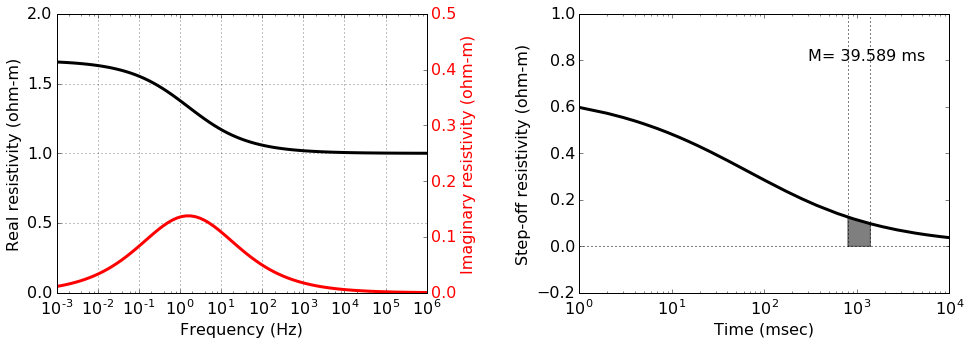

In [6]:

def viz(eta=0.1, tau=0.1, c=0.5, sigres="sigma", t1=800, t2=1400):
    frequency = np.logspace(-3, 6, 81)
    val = ColeColePelton(frequency, 1., eta, tau, c, option=sigres)
    datFcn = lambda f: ColeColePelton(f, 1., eta, tau, c, option=sigres)
    dt = 1e-3
    time = np.arange(10000)*dt + dt
    valT = transFilt(datFcn, time)
    fig= plt.figure(figsize = (16, 5))
    gs = matplotlib.gridspec.GridSpec(7, 7)        
    axColeR = fig.add_subplot(gs[:, :3])     #Left                
    axColeI = axColeR.twinx()
    axColeRT = fig.add_subplot( gs[:,4:])  #Right-Top
    valR = val.real
    valI = abs(val.imag)    
    axColeR.semilogx(frequency, valR, color='k', linewidth=3)    
    axColeI.semilogx(frequency, valI, color='r', linewidth=3)  
    axColeR.set_xlabel("Frequency (Hz)")    
    axColeRT.semilogx(time*1e3, valT, 'k', linewidth=3)
    axColeRT.set_xlabel("Time (msec)")
    axColeR.grid(True)
    tind = np.logical_and(time>=t1*1e-3, time<=t2*1e-3)
    if sigres == "sigma":
        axColeRT.plot(np.r_[1., 1e4], np.r_[0,0.], 'k:')        
        axColeR.set_ylim(0., 1.)
        axColeI.set_ylim(0., 0.2)
        axColeR.set_ylabel("Real conductivity (S/m)")   
        axColeI.set_ylabel("Imaginary conductivity (S/m)", color="r")            
        axColeRT.set_ylabel("Step-off conductivity (S/m)") 
        axColeRT.set_ylim(-0.5, 0.1)        
    elif sigres == "resis":
        M = valT[tind].sum()*dt*1e3 / (1./(1.-eta))
        axColeRT.text(3e2, 0.8, ("M= %5.3f ms")%(M))       
        axColeR.set_ylim(0., 2.)
        axColeI.set_ylim(0., 0.5)
        axColeR.set_ylabel("Real resistivity (ohm-m)")   
        axColeI.set_ylabel("Imaginary resistivity (ohm-m)", color="r")              
        axColeRT.set_ylabel("Step-off resistivity (ohm-m)")     
        axColeRT.set_ylim(-0.1*2,0.5*2)     
        axColeRT.plot(np.r_[t1, t1], np.r_[0,0.5*2], 'k:')
        axColeRT.plot(np.r_[t2, t2], np.r_[0,0.5*2], 'k:')
        axColeRT.plot(np.r_[1., 1e4], np.r_[0,0.], 'k:')            
        axColeRT.fill_between(time[tind]*1e3, valT[tind], 0., color='k', alpha=0.5)
    for tl in axColeI.get_yticklabels():
        tl.set_color('r')   
#     return fig
interact(viz, eta=FloatSlider(min=0.1, max=0.5, step=0.05, value=0.4), 
         tau=FloatText(value=0.1), 
         c=FloatSlider(min=0.1, max=1., step=0.1, value=0.5), 
         sigres = ToggleButtons(options=['sigma','resis']), 
         t1=FloatText(value=800), 
         t2=FloatText(value=1400),          
        )

In [7]:
# !mkdir figures

In [40]:
# fig =viz(eta = 0.5,sigres="resis")
# fig.savefig("colecole_resis.png", dpi=300)